In [1]:
import pandas as pd 
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error



In [2]:
df = pd.read_csv("data.csv")
df.head()

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year,soc_stock_t_ha
0,2012,894,899.792969,898,892,894,895.900574,0.306919,-4,183,...,3374.608696,1089.260870,1546.869565,1574.503874,2215.650847,1688.021295,1375.511632,1220.169482,654.961158,68.793925
1,2011,61,56.898190,58,58,57,58.000286,0.123088,-7,181,...,2709.608696,374.478261,1166.391304,1582.043952,1427.600306,307.310126,999.502956,167.002686,501.502718,87.265779
2,2011,92,92.471191,89,91,90,92.729630,0.046061,-1,181,...,3195.043478,414.347826,1221.347826,1927.965549,1960.699712,583.722087,1090.225101,322.372259,434.762277,96.650384
3,2011,1560,1572.300049,1622,1570,1549,1547.678345,0.781243,-17,160,...,4063.727273,1790.043478,928.956522,1010.631962,1903.293570,2179.134552,2019.112468,1884.017720,472.453507,68.400738
4,2011,1176,1175.498901,1179,1176,1176,1170.957031,0.210475,-2,181,...,2652.260870,1022.217391,864.565217,646.826519,1687.594992,922.467112,857.199362,1366.888502,303.002824,35.314235


In [3]:
df.dropna().shape

(5091, 306)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Columns: 306 entries, year to soc_stock_t_ha
dtypes: float64(212), int64(94)
memory usage: 11.9 MB


In [5]:
df.describe(include="all") 

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year,soc_stock_t_ha
count,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,...,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000
mean,2011.011589,703.000982,702.989512,704.887056,704.098409,704.304066,702.360047,0.171150,-1.472009,196.266352,...,2926.502814,934.478293,1443.624366,1276.086012,1630.338114,1065.661213,1068.488921,1036.451850,453.205834,69.399018
std,0.285303,689.395483,689.818076,689.329857,689.650488,689.572815,689.939886,0.173190,15.523306,19.435374,...,576.318969,709.491148,646.012703,669.566579,828.002647,1005.472648,618.375897,1079.210268,197.820808,67.241177
min,2011.000000,-64.000000,-62.485870,-62.000000,-64.000000,-64.000000,-64.751762,0.006211,-146.000000,65.000000,...,884.869565,57.043478,209.086957,43.458035,32.174549,44.805950,121.464499,25.795410,72.230034,0.178608
25%,2011.000000,178.500000,177.082237,179.000000,179.000000,179.000000,177.300896,0.058714,-4.000000,184.000000,...,2531.978261,382.565217,991.347826,716.760909,970.811955,222.691322,588.573861,107.901579,305.694851,30.201763
50%,2011.000000,383.000000,382.266815,384.000000,383.000000,381.000000,381.222198,0.103695,0.000000,199.000000,...,2842.695652,736.913043,1322.608696,1264.965743,1594.603804,639.540645,924.875167,649.356386,415.923707,49.241095
75%,2011.000000,1228.000000,1228.776917,1230.000000,1229.000000,1228.500000,1229.918152,0.212986,2.000000,210.000000,...,3244.173913,1234.739130,1741.195652,1831.894627,2293.518117,1741.368234,1392.175076,1767.075432,572.038427,82.367462
max,2019.000000,3531.000000,3521.041748,3523.000000,3580.000000,3536.000000,3522.890137,1.000000,150.000000,252.000000,...,5668.818182,4272.304348,4684.826087,3406.645239,3559.256708,3867.800669,3193.912846,4049.046509,1249.752010,497.756299


<AxesSubplot: >

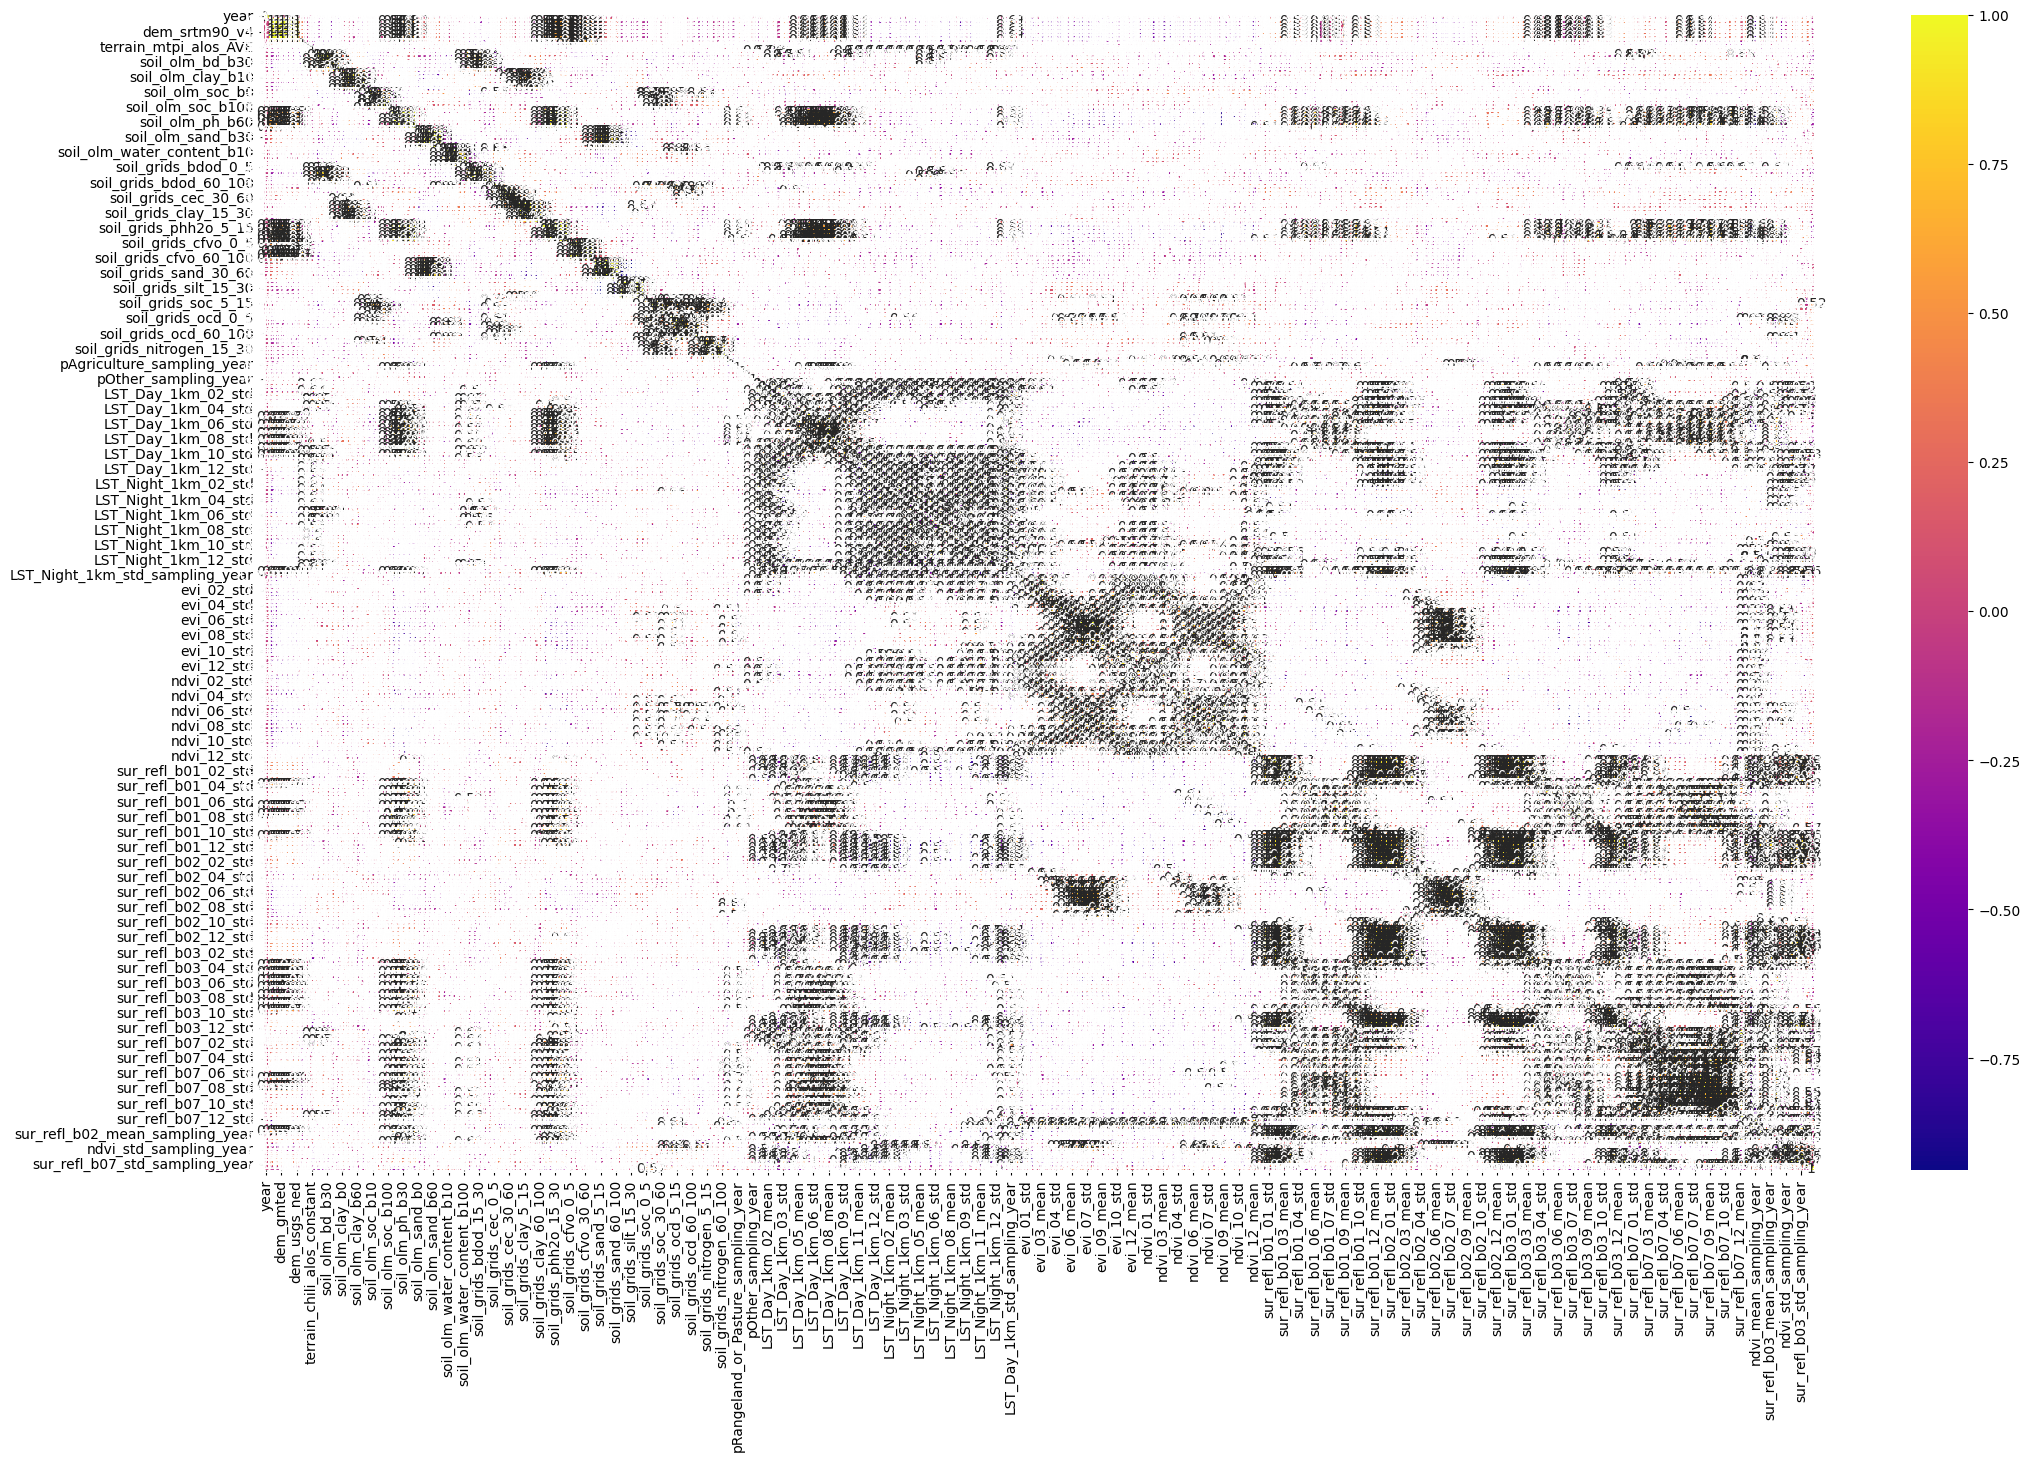

In [6]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(), annot=True, cmap='plasma') # Check the multicollinearity between the features

In [19]:
import numpy as np
# Function to find feature with biggest correlation. 
# I've chosen those features that have correlation bigger than 0.95

def biggest_features(df):
    df = df.fillna(df.mean())

    corr_matrix = df.corr().abs()
    features = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    
    # Find features with correlation greater than 0.95 and drop them
    to_drop = []
    for column in features.columns:
        if any(features[column] > 0.95):
            to_drop.append(column)
    
    df.drop(to_drop, axis=1, inplace=True)
    return df

In [20]:
X = df.iloc[:,1:-1]
y = (df.iloc[:,-1:])

In [21]:
X_clean = biggest_features(X)

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X_clean, y, random_state=1313, test_size=1/3)

In [23]:
print(f"Min {xtrain.min()}")
print(f"Max {xtrain.max()}")


Min dem_nasa_dem30                    -64.000000
terrain_topo_div_alos_constant      0.007281
terrain_mtpi_alos_AVE            -146.000000
terrain_chili_alos_constant        65.000000
soil_olm_bd_b0                     66.000000
                                     ...    
evi_std_sampling_year              43.458035
ndvi_std_sampling_year             55.849176
sur_refl_b01_std_sampling_year     44.805950
sur_refl_b02_std_sampling_year    121.464499
sur_refl_b07_std_sampling_year     72.230034
Length: 187, dtype: float64
Max dem_nasa_dem30                    3531.000000
terrain_topo_div_alos_constant       0.994341
terrain_mtpi_alos_AVE              150.000000
terrain_chili_alos_constant        247.000000
soil_olm_bd_b0                     178.000000
                                     ...     
evi_std_sampling_year             2994.963886
ndvi_std_sampling_year            3559.256708
sur_refl_b01_std_sampling_year    3829.019148
sur_refl_b02_std_sampling_year    3193.912846
sur_refl_

In [24]:
from sklearn.linear_model import LinearRegression,SGDRegressor,ElasticNet,BayesianRidge
from sklearn.svm import SVR

model_names= {
    'Linear Regression':LinearRegression(),
    'SGD':SGDRegressor(),
    'Elastic Net':ElasticNet(),
    'Bayesian':BayesianRidge(),
    'SVR':SVR()
}

In [25]:
# Iterate over several training models and show results


for model_name, model in model_names.items():
    reg = model.fit(xtrain, ytrain)
    yprediction = model.predict(xtest)
    print(f"Model: {model_name}")
    print("MSE score:", sqrt(mean_squared_error(y_true = ytest, y_pred = yprediction)))
    print("MAE score: ", mean_absolute_error(ytest, yprediction))
    print('Training R2 score: ' + str(reg.score(xtrain, ytrain)))
    print('Test R2 score: ' + str(reg.score(xtest, ytest)))
    print("R2 score", reg.score(xtest, ytest))
    print("MAE score", mean_absolute_error(ytest, yprediction))
    print("\n\n\n")

Model:Linear Regression
MSE score: 53.88704499983497
MAE score:  34.65261150487687
Training R2 score: 0.4685227997801036
Test R2 score: 0.335786287391174
R2 score 0.335786287391174
MAE score 34.65261150487687






/home/klaus/Documents/Developments/seqana_data_student_task/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model:SGD
MSE score: 6.437374310612173e+16
MAE score:  5.187963158256858e+16
Training R2 score: -9.020341773546978e+29
Test R2 score: -9.478871257019162e+29
R2 score -9.478871257019162e+29
MAE score 5.187963158256858e+16






/home/klaus/Documents/Developments/seqana_data_student_task/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.863e+06, tolerance: 1.559e+03
  model = cd_fast.enet_coordinate_descent(
/home/klaus/Documents/Developments/seqana_data_student_task/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model:Elastic Net
MSE score: 53.63647907604239
MAE score:  34.33517150981122
Training R2 score: 0.4660920639888936
Test R2 score: 0.3419488961579127
R2 score 0.3419488961579127
MAE score 34.33517150981122




Model:Bayesian
MSE score: 53.32537072377673
MAE score:  33.21488826031768
Training R2 score: 0.4164463800337408
Test R2 score: 0.34956056131801627
R2 score 0.34956056131801627
MAE score 33.21488826031768






/home/klaus/Documents/Developments/seqana_data_student_task/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model:SVR
MSE score: 62.6326741902576
MAE score:  34.15919089394564
Training R2 score: 0.11077015711769855
Test R2 score: 0.10269309578328145
R2 score 0.10269309578328145
MAE score 34.15919089394564




